In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from ase.build import bulk

In [4]:
from ase.calculators.emt import EMT

In [5]:
from atomistics.calculators.ase_interface.calculator import evaluate_with_ase

In [6]:
from atomistics.workflows.phonons.workflow import PhonopyWorkflow

In [7]:
from phonopy.units import VaspToTHz

In [8]:
calculator = PhonopyWorkflow(
    structure=bulk("Al", a=4.0, cubic=True),
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
    dos_mesh=20,
    primitive_matrix=None,
    number_of_snapshots=None,
)

In [9]:
structure_dict = calculator.generate_structures()

In [10]:
result_dict = evaluate_with_ase(task_dict=structure_dict, ase_calculator_class=EMT)

In [11]:
mesh_dict, dos_dict = calculator.analyse_structures(output_dict=result_dict)

In [12]:
T_min = 0
T_max = 800 # a bit below melting
T_step = 25
temperatures = np.linspace(T_min, T_max, int((T_max - T_min) / T_step))

In [13]:
thermal_dict = calculator.get_thermal_properties(temperatures=temperatures) 

Text(0, 0.5, 'Free energy  ($F_{vib}$)  [eV]')

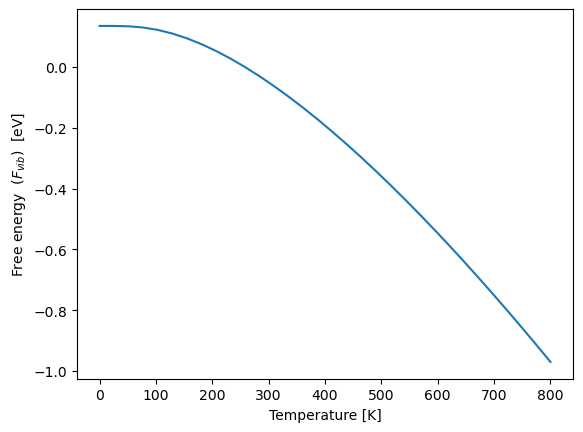

In [14]:
plt.plot(thermal_dict['temperatures'], thermal_dict['free_energy'])
plt.xlabel("Temperature [K]")
plt.ylabel("Free energy  ($F_{vib}$)  [eV]")

<Axes: title={'center': 'Phonon DOS vs Energy'}, xlabel='Frequency [THz]', ylabel='DOS'>

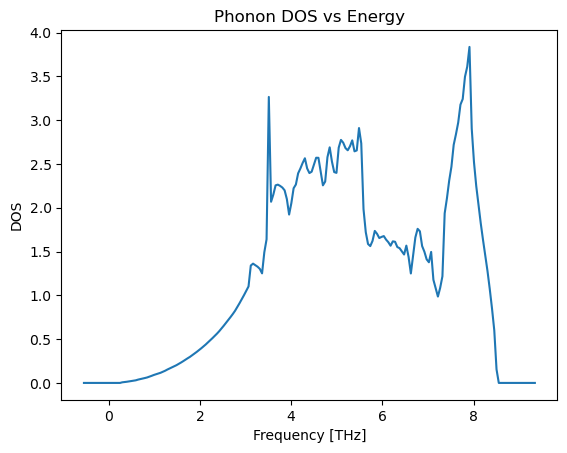

In [15]:
calculator.plot_dos()

<Axes: title={'center': 'Bandstructure'}, xlabel='Bandpath', ylabel='Frequency [THz]'>

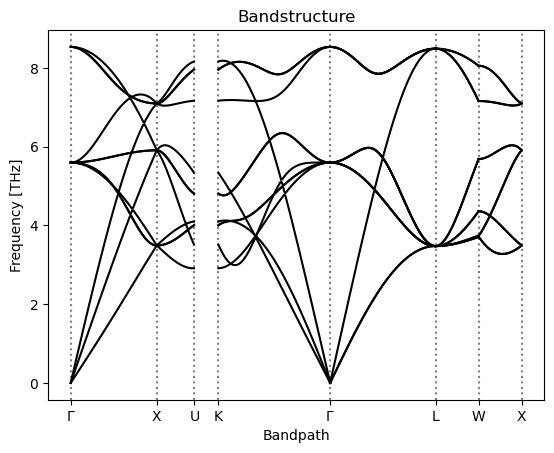

In [16]:
calculator.plot_band_structure()

In [17]:
calculator.get_dynamical_matrix()

array([[ 1.28114847e-01,  0.00000000e+00,  0.00000000e+00,
         2.78400491e-19, -2.14138635e-35, -3.23528094e-19,
        -4.11876892e-18,  3.21464892e-20,  7.82123576e-02,
         7.97853292e-18,  6.24571017e-36, -3.23530462e-19],
       [ 0.00000000e+00,  1.42904974e-01,  5.77632227e-21,
        -3.39052838e-35,  7.98073614e-18, -6.15648574e-35,
         3.21464892e-20, -2.57171913e-19, -6.42929783e-20,
         6.24571124e-36,  7.98073614e-18,  2.57914371e-35],
       [ 0.00000000e+00,  5.77632227e-21,  1.28114847e-01,
        -3.23530462e-19, -6.24571017e-35,  7.97853292e-18,
         7.82123576e-02, -1.60732446e-19, -8.03662229e-21,
        -3.23528094e-19,  3.15770838e-36,  2.78400491e-19],
       [ 2.78400491e-19, -3.39052838e-35, -3.23530462e-19,
         1.28114847e-01,  0.00000000e+00,  0.00000000e+00,
         7.97853292e-18,  8.03019879e-36, -3.23530462e-19,
         4.11475061e-18, -6.42929783e-20,  7.82123576e-02],
       [-2.14138635e-35,  7.98073614e-18, -6.2457101

In [18]:
calculator.get_hesse_matrix()

array([[ 3.73299180e-02,  1.43968646e-32, -1.69654682e-32, ...,
         1.87801956e-05,  6.37114501e-05,  1.18515925e-04],
       [-0.00000000e+00,  3.73299180e-02, -0.00000000e+00, ...,
         6.37114501e-05,  1.87801956e-05,  1.18515925e-04],
       [-0.00000000e+00, -0.00000000e+00,  3.73299180e-02, ...,
         1.18518879e-04,  1.18518879e-04,  2.00470741e-04],
       ...,
       [ 1.87801956e-05,  6.37114501e-05,  1.18515925e-04, ...,
         3.73299180e-02,  1.43968646e-32, -1.69654682e-32],
       [ 6.37114501e-05,  1.87801956e-05,  1.18515925e-04, ...,
         0.00000000e+00,  3.73299180e-02,  0.00000000e+00],
       [ 1.18518879e-04,  1.18518879e-04,  2.00470741e-04, ...,
         0.00000000e+00,  0.00000000e+00,  3.73299180e-02]])